# 保存和加载表面
在本笔记本中，我们将使用[vedo](https://vedo.embl.es/)将表面保存到磁盘并从中重新加载。

另请参阅
* https://vedo.embl.es/docs/vedo/io.html#write
* https://vedo.embl.es/docs/vedo/io.html#load

In [1]:
import napari_process_points_and_surfaces as nppas
import vedo

from branchoid import branchoid

起点仍然是模拟分支体的表面。

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
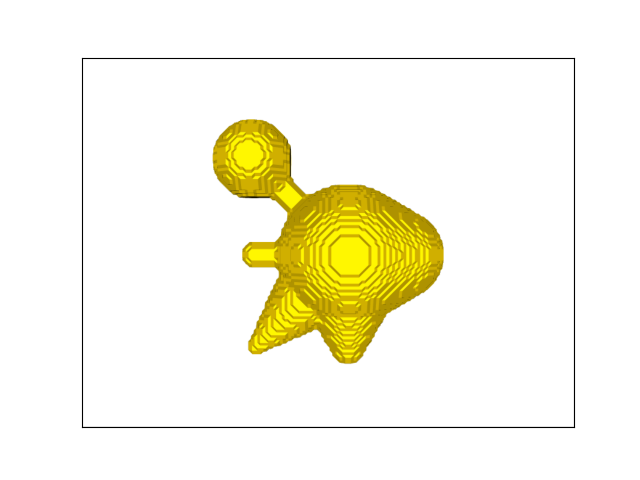

In [2]:
binary_image = branchoid()
surface = nppas.all_labels_to_surface(binary_image)
surface

## 将表面保存到磁盘
[vedo](https://vedo.embl.es/)库提供了保存和加载表面网格的功能。为了将它们从/转换为napari兼容的表面元组，我们使用[napari-process-points-and-surfaces (nppas)](https://github.com/haesleinhuepf/napari-process-points-and-surfaces)。

In [3]:
mesh = nppas.to_vedo_mesh(surface)

filename = "../../data/branchoid.ply"

_ = vedo.write(mesh, filename)

## 从磁盘加载网格

<Mesh(0x000001E7DB0C8370) at 0x000001E7F7F8FD60>
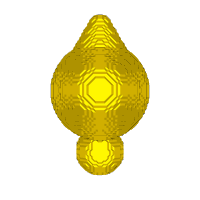

In [4]:
new_mesh = vedo.load(filename)
new_mesh

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
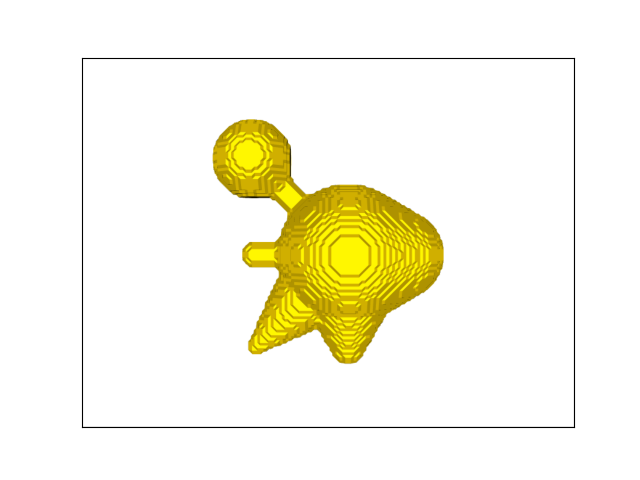

In [5]:
new_surface = nppas.to_napari_surface_data(new_mesh)
new_surface